In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#I will now determine how many entries are present and if there are any gaps in the data. I can see that "Cabin" has a few NaN values.
len(data_train)

891

In [6]:
data_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
#I am going to bin the ages and start some data visualization
bins = [0,10,20,30,40,50,60,70,80]
data_train['Ages_Plot']=pd.cut(data_train['Age'], bins)

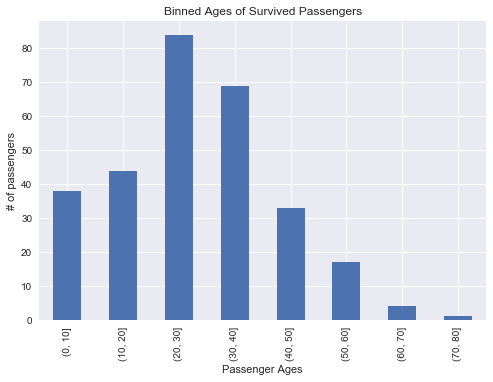

In [13]:
data_train[data_train['Survived']==1]['Ages_Plot'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.xlabel('Passenger Ages')
plt.title('Binned Ages of Survived Passengers')

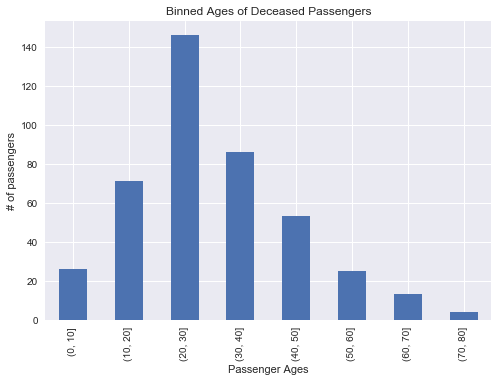

In [15]:
data_train[data_train['Survived']==0]['Ages_Plot'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.xlabel('Passenger Ages')
plt.title('Binned Ages of Deceased Passengers')

In [16]:
#The distribution seems to be similar in both cases, I will check the mean age onboard.
data_train['Age'].mean()

29.69911764705882

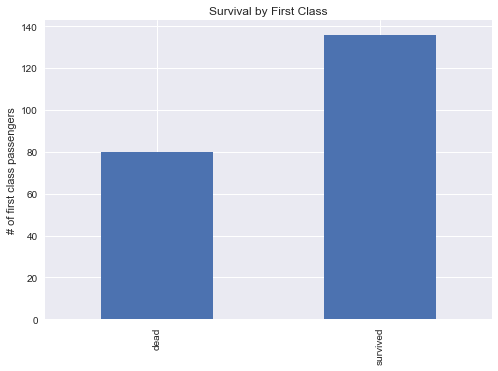

In [17]:
data_train[data_train['Pclass']==1]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of first class passengers')
plt.gca().set_xticklabels(['dead','survived'])
plt.title('Survival by First Class')

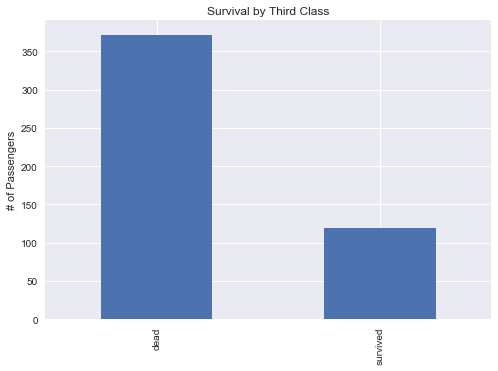

In [19]:
data_train[data_train['Pclass']==3]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel("# of Passengers")
plt.gca().set_xticklabels(["dead",'survived'])
plt.title('Survival by Third Class')

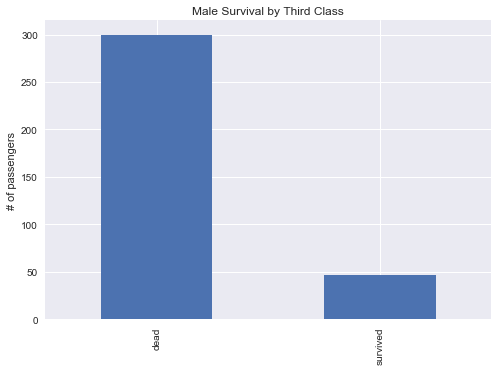

In [20]:
data_train[(data_train['Pclass']==3) & (data_train['Sex']=='male')]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.gca().set_xticklabels(['dead','survived'])
plt.title('Male Survival by Third Class')

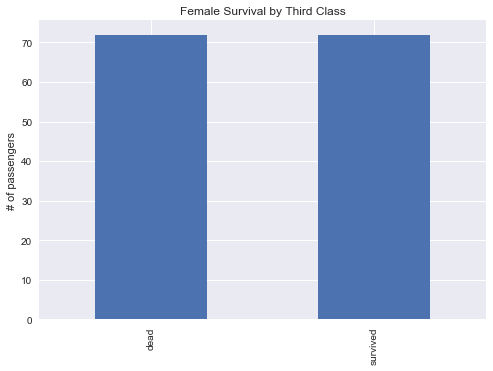

In [21]:
data_train[(data_train['Pclass']==3) & (data_train['Sex']=='female')]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.gca().set_xticklabels(['dead','survived'])
plt.title('Female Survival by Third Class')

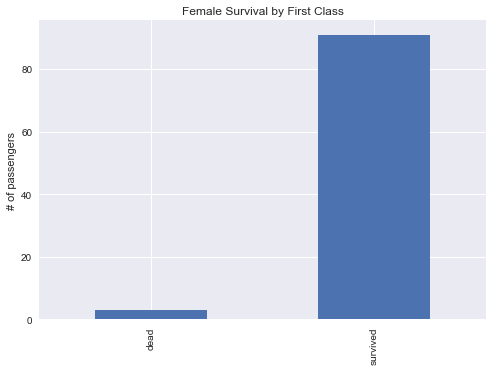

In [22]:
data_train[(data_train['Pclass']==1) & (data_train['Sex']=='female')]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.gca().set_xticklabels(['dead','survived'])
plt.title('Female Survival by First Class')

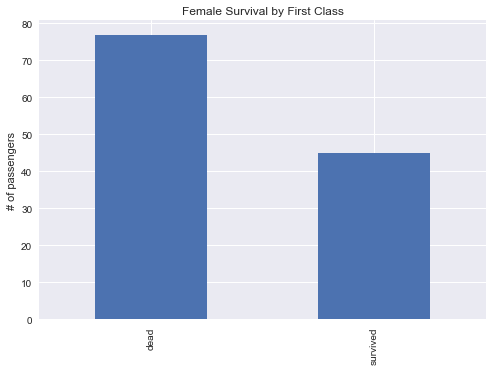

In [23]:
data_train[(data_train['Pclass']==1) & (data_train['Sex']=='male')]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.gca().set_xticklabels(['dead','survived'])
plt.title('Female Survival by First Class')

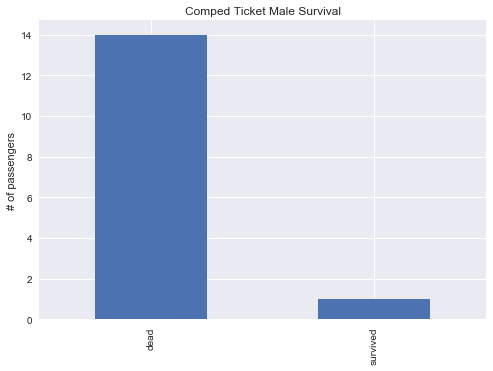

In [26]:
#I am curious if a free fare indicates a higher level of survival for men or women.
data_train[(data_train['Fare']==0) & (data_train['Sex']=='male')]['Survived'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('# of passengers')
plt.gca().set_xticklabels(['dead','survived'])
plt.title('Comped Ticket Male Survival')

In [30]:
data_train[(data_train['Fare']==0) & (data_train['Sex']=='female')].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Ages_Plot      0
dtype: int64

In [31]:
#It appears that no female was registered to have recieved a free ticket.

In [32]:
#I will now start my preprocessing and drop features that I see as unecessary.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def drop_features(df):
    return df.drop(['Ticket','Embarked', 'Cabin'], axis=1)
data_train=drop_features(data_train)
data_test=drop_features(data_test)

In [33]:
#Since there are string values in a few columns, I will encode them so that they are converted to a unique number that
#my classifier will recognize
def encode (data_train, data_test):
    features = ['Sex','Name']
    joined = pd.concat([data_train[features], data_test[features]])
    for i in features:
        le.fit(joined[i])
        data_train[i]=le.transform(data_train[i])
        data_test[i]=le.transform(data_test[i])
    return data_train, data_test

data_train, data_test = encode(data_train, data_test)

In [34]:
#I will now check to see if the function worked
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Ages_Plot
0,1,0,3,155,1,22.0,1,0,7.2500,"(20, 30]"
1,2,1,1,286,0,38.0,1,0,71.2833,"(30, 40]"
2,3,1,3,523,0,26.0,0,0,7.9250,"(20, 30]"
3,4,1,1,422,0,35.0,1,0,53.1000,"(30, 40]"
4,5,0,3,22,1,35.0,0,0,8.0500,"(30, 40]"


In [55]:
#I will need to drop the "Ages_Plot" feature.
data_train = data_train.drop['Ages_Plot']
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,155,1,22.0,1,0,7.2500
1,2,1,1,286,0,38.0,1,0,71.2833
2,3,1,3,523,0,26.0,0,0,7.9250
3,4,1,1,422,0,35.0,1,0,53.1000
4,5,0,3,22,1,35.0,0,0,8.0500


In [53]:
#I will now split the training data and fill the NaN's.
from sklearn.model_selection import train_test_split
data_train.Age = data_train.Age.fillna(0)
data_test.Age = data_test.Age.fillna(0)
data_test.Fare = data_test.Fare.fillna(0)

In [54]:
#I will chose 20% of the data to test.
X = data_train.drop(['Survived', 'PassengerId'], 1)
Y = data_train['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=23)

In [45]:
#I have worked most with SVM, so I will start with it.
from sklearn import svm
clf=svm.LinearSVC()
clf.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [46]:
clf.predict(X_test[0:1])
print (clf.score(X_test,Y_test))

0.430167597765


In [41]:
#To see if my accuracy can improve, I will check the sklearn documentation for other suitable classifiers and try
#and try and implement their code here.

In [42]:
#I will use RandomForestClassifier, but, will pick arbitrary values as parameters, becasue admittedly, I do not fully understand their application

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier()

#arbiratry parameter settings I got from the sklearn documentation.
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# choice of scoring from the documentation
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, Y_train)

# Estimator is a handy attribute.
clf = grid_obj.best_estimator_
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
clf.predict(X_test[0:1])

array([1])

In [48]:
#I will use cross validation to see if this model is any good.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, cv=5)
scores 

array([ 0.62569832,  0.73743017,  0.55617978,  0.70786517,  0.70621469])

In [49]:
#I will now make a dataframe of the predicted values using the test data. 
predictions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : data_test['PassengerId'], 'Survived': predictions })
output.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [50]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,155,1,22.0,1,0,7.2500
1,2,1,1,286,0,38.0,1,0,71.2833
2,3,1,3,523,0,26.0,0,0,7.9250
3,4,1,1,422,0,35.0,1,0,53.1000
4,5,0,3,22,1,35.0,0,0,8.0500


In [51]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,638,1,34.5,0,0,7.8292
1,893,3,1266,0,47.0,1,0,7.0000
2,894,2,837,1,62.0,0,0,9.6875
3,895,3,1278,1,27.0,0,0,8.6625
4,896,3,543,0,22.0,1,1,12.2875


In [56]:
output.sample(10)

,PassengerId,Survived
360,1252,1
293,1185,1
192,1084,1
138,1030,1
174,1066,0
117,1009,1
85,977,1
172,1064,1
254,1146,1
197,1089,1
